In [36]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import networkx as nx

plt.style.use("dark_background")

In [9]:
results_dir = "../experiments/outputs/2021-07-26_07-14_dist_mnsit_postfix_rho"

results_r1 = torch.load(os.path.join(results_dir, "rho_1_results.pt")) 
results_r100 = torch.load(os.path.join(results_dir, "rho_100_results.pt"))
results_r1000 = torch.load(os.path.join(results_dir, "rho_1000_results.pt"))

# Communication Graph

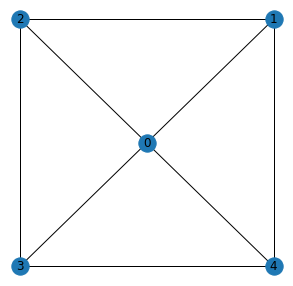

In [40]:
G = nx.read_gpickle(os.path.join(results_dir, "graph.gpickle"))

(fig, ax) = plt.subplots(figsize=(5, 5))
nx.draw_kamada_kawai(G, with_labels=True)


# Validation loss and accuracy results

Text(0, 0.5, 'Top1 Accuracy')

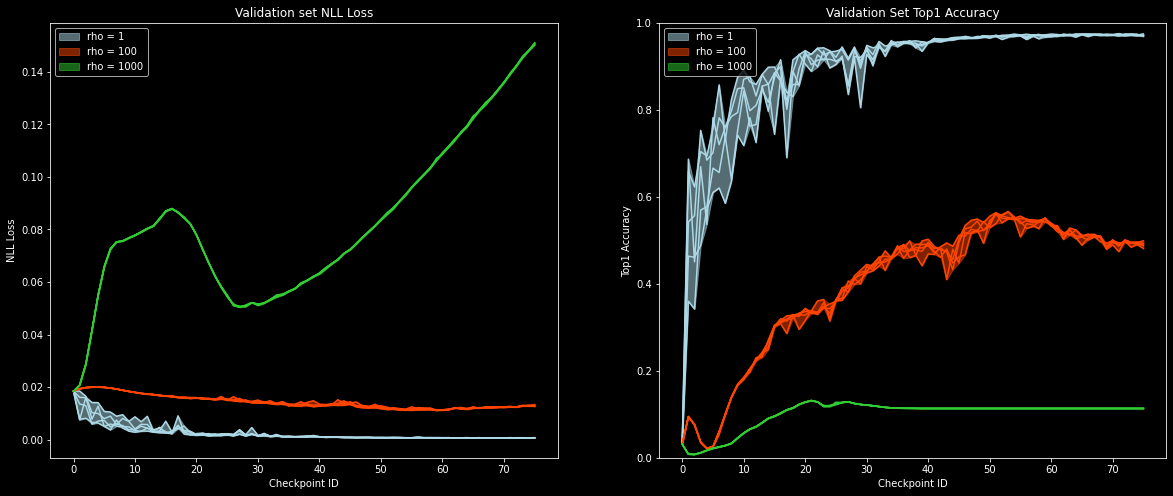

In [68]:
vl_r1 = torch.stack(results_r1["validation_loss"])
vl_r100 = torch.stack(results_r100["validation_loss"])
vl_r1000 = torch.stack(results_r1000["validation_loss"])

ac_r1 = torch.stack(results_r1["top1_accuracy"])
ac_r100 = torch.stack(results_r100["top1_accuracy"])
ac_r1000 = torch.stack(results_r1000["top1_accuracy"])

(fig, (ax0, ax1)) = plt.subplots(ncols=2, figsize=(20, 8))

ax0.plot(vl_r1, c="lightblue")
ax0.fill_between(np.arange(vl_r1.shape[0]), torch.amax(vl_r1, dim=1), torch.amin(vl_r1, dim=1), color="lightblue", alpha=0.5, label="rho = 1")
ax0.plot(vl_r100, c="orangered")
ax0.fill_between(np.arange(vl_r100.shape[0]), torch.amax(vl_r100, dim=1), torch.amin(vl_r100, dim=1), color="orangered", alpha=0.5, label="rho = 100")
ax0.plot(vl_r1000, c="limegreen")
ax0.fill_between(np.arange(vl_r1000.shape[0]), torch.amax(vl_r1000, dim=1), torch.amin(vl_r1000, dim=1), color="limegreen", alpha=0.5, label="rho = 1000")
#ax0.set_ylim((0.0, torch.amax(torch.amax(vl_r1))))
ax0.legend()
ax0.set_title("Validation set NLL Loss")
ax0.set_xlabel("Checkpoint ID")
ax0.set_ylabel("NLL Loss")

ax1.plot(ac_r1, c="lightblue")
ax1.fill_between(np.arange(ac_r1.shape[0]), torch.amax(ac_r1, dim=1), torch.amin(ac_r1, dim=1), color="lightblue", alpha=0.5, label="rho = 1")
ax1.plot(ac_r100, c="orangered")
ax1.fill_between(np.arange(ac_r100.shape[0]), torch.amax(ac_r100, dim=1), torch.amin(ac_r100, dim=1), color="orangered", alpha=0.5, label="rho = 100")
ax1.plot(ac_r1000, c="limegreen")
ax1.fill_between(np.arange(ac_r1000.shape[0]), torch.amax(ac_r1000, dim=1), torch.amin(ac_r1000, dim=1), color="limegreen", alpha=0.5, label="rho = 1000")
ax1.set_ylim((0.0, 1.0))
ax1.legend()
ax1.set_title("Validation Set Top1 Accuracy")
ax1.set_xlabel("Checkpoint ID")
ax1.set_ylabel("Top1 Accuracy")


# Consensus Error

In [ ]:
N = 5

